## Gathering Data

#### Step 1: Importing required packages/libraries

In [39]:
import pandas as pd
import requests
import tweepy
import json
import numpy as np

#### Step 2: Gathering data by uploading given csv file

In [40]:
csv_file_data = pd.read_csv('twitter-archive-enhanced.csv')

#### Step 3: Gathering data by programmatically downloading the image predictions tsv file using requests library

In [4]:
image_pred_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_pred_data = requests.get(image_pred_url)
with open('image_pred.tsv', 'wb') as file:
    file.write(image_pred_data.content)

In [41]:
tsv_image_data = pd.read_csv('image_pred.tsv', sep='\t')

#### Step 4: Gathering json data about relevant tweets by using the Twitter API (tweepy library)

In [7]:
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'                     # add your own key and token values
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXX-XXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
tweet_ids = csv_file_data['tweet_id']
tweet_ids_with_errors = []
for tweet_id in tweet_ids:
    try:
        print(tweet_id)
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        with open('tweet_json.txt', 'a') as outfile:
            json.dump(tweet._json, outfile)
            outfile.write('\n')
    except Exception as e:
        print(str(tweet_id) + ": " + str(e))
        tweet_ids_with_errors.append(tweet_id)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
88299208

828801551087042563
828770345708580865
828708714936930305
828650029636317184
828409743546925057
828408677031882754
828381636999917570
828376505180889089
828372645993398273
828361771580813312
828046555563323392
828011680017821696
827933404142436356
827653905312006145
827600520311402496
827324948884643840
827228250799742977
827228250799742977: [{'code': 144, 'message': 'No status found with that ID.'}]
827199976799354881
826958653328592898
826848821049180160
826615380357632002
826598799820865537
826598365270007810
826476773533745153
826240494070030336
826204788643753985
826115272272650244
825876512159186944
825829644528148480
825535076884762624
825147591692263424
825120256414846976
825026590719483904
824796380199809024
824775126675836928
824663926340194305
824325613288833024
824297048279236611
824025158776213504
823939628516474880
823719002937630720
823699002998870016
823581115634085888
823333489516937216
823322678127919110
823269594223824897
822975315408461824
822872901745569793
82285913

775733305207554048
775729183532220416
775364825476165632
775350846108426240
775096608509886464
775096608509886464: [{'code': 144, 'message': 'No status found with that ID.'}]
775085132600442880
774757898236878852
774639387460112384
774314403806253056
773985732834758656
773922284943896577
773704687002451968
773670353721753600
773547596996571136
773336787167145985
773308824254029826
773247561583001600
773191612633579521
772877495989305348
772826264096874500
772615324260794368
772581559778025472
772193107915964416
772152991789019136
772117678702071809
772114945936949249
772102971039580160
771908950375665664
771770456517009408
771500966810099713
771380798096281600
771171053431250945
771136648247640064
771102124360998913
771014301343748096
771004394259247104
771004394259247104: [{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]
770787852854652928
770772759874076672
770743923962707968
770743923962707968: [{'code': 144, 'message': 'No status found with that ID.'}]

718971898235854848
718939241951195136
718631497683582976
718613305783398402
718540630683709445
718460005985447936
718454725339934721
718246886998687744
718234618122661888
717841801130979328
717790033953034240
717537687239008257
717428917016076293
717421804990701568
717047459982213120
717009362452090881
716802964044845056
716791146589110272
716730379797970944
716447146686459905
716439118184652801
716285507865542656
716080869887381504
715928423106027520
715758151270801409
715733265223708672
715704790270025728
715696743237730304
715680795826982913
715360349751484417
715342466308784130
715220193576927233
715200624753819648
715009755312439296
714982300363173890
714962719905021952
714957620017307648
714631576617938945
714606013974974464
714485234495041536
714258258790387713
714251586676113411
714214115368108032
714141408463036416
713919462244790272
713909862279876608
713900603437621249
713761197720473600
713411074226274305
713177543487135744
713175907180089344
712809025985978368
712717840512

685321586178670592
685315239903100929
685307451701334016
685268753634967552
685198997565345792
685169283572338688
684969860808454144
684959798585110529
684940049151070208
684926975086034944
684914660081053696
684902183876321280
684880619965411328
684830982659280897
684800227459624960
684594889858887680
684588130326986752
684567543613382656
684538444857667585
684481074559381504
684460069371654144
684241637099323392
684225744407494656
684222868335505415
684200372118904832
684195085588783105
684188786104872960
684177701129875456
684147889187209216
684122891630342144
684097758874210310
683857920510050305
683852578183077888
683849932751646720
683834909291606017
683828599284170753
683773439333797890
683742671509258241
683515932363329536
683498322573824003
683481228088049664
683462770029932544
683449695444799489
683391852557561860
683357973142474752
683142553609318400
683111407806746624
683098815881154561
683078886620553216
683030066213818368
682962037429899265
682808988178739200
682788441537

671547767500775424
671544874165002241
671542985629241344
671538301157904385
671536543010570240
671533943490011136
671528761649688577
671520732782923777
671518598289059840
671511350426865664
671504605491109889
671497587707535361
671488513339211776
671486386088865792
671485057807351808
671390180817915904
671362598324076544
671357843010908160
671355857343524864
671347597085433856
671186162933985280
671182547775299584
671166507850801152
671163268581498880
671159727754231808
671154572044468225
671151324042559489
671147085991960577
671141549288370177
671138694582165504
671134062904504320
671122204919246848
671115716440031232
671109016219725825
670995969505435648
670842764863651840
670840546554966016
670838202509447168
670833812859932673
670832455012716544
670826280409919488
670823764196741120
670822709593571328
670815497391357952
670811965569282048
670807719151067136
670804601705242624
670803562457407488
670797304698376195
670792680469889025
670789397210615808
670786190031921152
670783437142

In [42]:
tweet_json_data = pd.read_json('tweet_json.txt', lines=True)

## Assessing Data

#### Step 1: Visually identifying issues

In [8]:
csv_file_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
tsv_image_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
tweet_json_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",34679,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7238,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",30046,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,5421,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",22621,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,3580,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",37957,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,7448,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",36229,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,7995,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",18265,False,Here we have a majestic great white breaching ...,NaN,...,NaN,NaN,NaN,NaN,2685,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",10640,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,NaN,NaN,NaN,NaN,1728,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",58397,False,When you watch your owner call another dog a g...,NaN,...,NaN,NaN,NaN,NaN,16283,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",25160,False,This is Zoey. She doesn't want to be one of th...,NaN,...,NaN,NaN,NaN,NaN,3727,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",28681,False,This is Cassie. She is a college pup. Studying...,NaN,...,NaN,NaN,NaN,NaN,6293,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


#### Step 2 : Programatically identifying issues

In [9]:
csv_file_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
csv_file_data[csv_file_data['rating_denominator'] != 10][['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11
902,Why does this never happen at my front door......,165,150
1068,"After so many requests, this is Bretagne. She ...",9,11
1120,Say hello to this unbelievably well behaved sq...,204,170
1165,Happy 4/20 from the squad! 13/10 for all https...,4,20
1202,This is Bluebert. He just saw that both #Final...,50,50


In [15]:
tsv_image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2328 non-null datetime64[ns]
display_text_range               2328 non-null object
entities                         2328 non-null object
extended_entities                2058 non-null object
favorite_count                   2328 non-null int64
favorited                        2328 non-null bool
full_text                        2328 non-null object
geo                              0 non-null float64
id                               2328 non-null int64
id_str                           2328 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [25]:
csv_file_data[csv_file_data['name'] == "None"][['text', 'name']]

,text,name
5,Here we have a majestic great white breaching ...,None
7,When you watch your owner call another dog a g...,None
12,Here's a puppo that seems to be on the fence a...,None
24,You may not have known you needed to see this ...,None
25,This... is a Jubilant Antarctic House Bear. We...,None
30,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None
32,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None
35,I have a new hero and his name is Howard. 14/1...,None
37,Here we have a corgi undercover as a malamute....,None
41,"I present to you, Pup in Hat. Pup in Hat is gr...",None


In [7]:
csv_file_data[csv_file_data.name.duplicated()].name.value_counts()

None         744
a             54
Charlie       11
Lucy          10
Cooper        10
Oliver        10
Lola           9
Penny          9
Tucker         9
Winston        8
Bo             8
Sadie          7
the            7
Daisy          6
Buddy          6
an             6
Toby           6
Bailey         6
Milo           5
Scout          5
Jax            5
Stanley        5
Jack           5
Oscar          5
Leo            5
Dave           5
Bella          5
Rusty          5
Koda           5
Sammy          4
            ... 
Hobbes         1
Curtis         1
Kenneth        1
Fred           1
Atlas          1
Axel           1
Pickles        1
Canela         1
Philbert       1
Jackson        1
Cali           1
Kyro           1
Stubert        1
Timison        1
Ollie          1
Chuckles       1
Misty          1
Lenny          1
Eve            1
Sugar          1
Kirby          1
Rocco          1
Luca           1
Moe            1
Shaggy         1
Keurig         1
Remington      1
Thumas        

Quality issues
1. Incorrect Record with 960/0 rating which should be 13/10
2. Incorrect Record with 9.75/10 mistaken as 75/10
3. Incorrect Record 1/2 rating which should be 9/10
4. Incorrect Record with rating 9/11. It should be 14/10
5. Incorrect Record with rating 4/20. It should be 13/10
6. Incorrect Record with rating 50/50. It should be 11/10
7. Incorrect Record with rating 7/11. It should be 10/10
8. Drop row with rating 24/7 as it is not a valid entry (has no rating to correct to)
9. Incorrect names for some dogs (a,an,the)
10. Multiple ratings with denominator more than 10 (mostly because of a group of dogs)
11. Duplicated data because of retweets and data with no images
12. Source column needs to be cleaned to depict the source clearly
13. Timestamp is of type String - should be datetime
14. retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns do not give any relevant information as we are filtering out retweets data and in_reply_to_status_id, in_reply_to_user_id have much too less information
15. tsv_image_data file consists of ratings which are not dog ratings

Tidiness issues
1. doggo, floofer, pupper, puppo - depict same information in 4 columns
2. text column has tweet text as well as tweet url information
3. tsv_image_data_clean table should have only three relevant columns - tweet_id, image_url, dog_breed
4. All information can be collected into one table related to unique tweet id


## Cleaning data

#### Make copies of datasets

In [43]:
csv_file_data_clean = csv_file_data.copy()
tsv_image_data_clean = tsv_image_data.copy()
tweet_json_data_clean = tweet_json_data.copy()

##### Quality Issues

#### Define
11. Filter out retweet data by using the condition retweeted_status_id is null.
Filter out tweets without any images by using the condition expanded_urls is not null

#### Code

In [44]:
csv_file_data_clean = csv_file_data_clean[csv_file_data_clean['retweeted_status_id'].isnull()]
csv_file_data_clean = csv_file_data_clean[csv_file_data_clean['expanded_urls'].notnull()]

#### Test

In [45]:
csv_file_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

#### Define
1. Find the tweet with rating 960/0 and change it to 13/10

#### Code

In [46]:
condition = ((csv_file_data_clean['rating_numerator'] == 960) & (csv_file_data_clean['rating_denominator'] == 0))
index_val = csv_file_data_clean[condition].index

In [47]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [48]:
csv_file_data_clean.loc[index_val, 'rating_numerator'] = 13
csv_file_data_clean.loc[index_val, 'rating_denominator'] = 10

#### Test

In [49]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define
2. Find the tweet with rating 75/10 and change it to 10/10

#### Code

In [50]:
condition = ((csv_file_data_clean['rating_numerator'] == 75) & (csv_file_data_clean['rating_denominator'] == 10))
index_val = csv_file_data_clean[condition].index

In [51]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [52]:
csv_file_data_clean.loc[index_val, 'rating_numerator'] = 10
csv_file_data_clean.loc[index_val, 'rating_denominator'] = 10

#### Test

In [53]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,10,10,Logan,None,None,None,None


#### Define
3. Find the tweet with rating 1/2 and change it to 9/10

#### Code

In [54]:
condition = ((csv_file_data_clean['rating_numerator'] == 1) & (csv_file_data_clean['rating_denominator'] == 2))
index_val = csv_file_data_clean[condition].index

In [55]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [56]:
csv_file_data_clean.loc[index_val, 'rating_numerator'] = 9
csv_file_data_clean.loc[index_val, 'rating_denominator'] = 10

#### Test

In [57]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9,10,an,None,None,None,None


#### Define
4. Find the tweet with rating 9/11 and change it to 14/10

#### Code

In [58]:
condition = ((csv_file_data_clean['rating_numerator'] == 9) & (csv_file_data_clean['rating_denominator'] == 11))
index_val = csv_file_data_clean[condition].index

In [59]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None


In [60]:
csv_file_data_clean.loc[index_val, 'rating_numerator'] = 14
csv_file_data_clean.loc[index_val, 'rating_denominator'] = 10

#### Test

In [61]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14,10,None,None,None,None,None


#### Define
5. Find the tweet with rating 4/20 and change it to 13/10

#### Code

In [62]:
condition = ((csv_file_data_clean['rating_numerator'] == 4) & (csv_file_data_clean['rating_denominator'] == 20))
index_val = csv_file_data_clean[condition].index

In [63]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None


In [64]:
csv_file_data_clean.loc[index_val, 'rating_numerator'] = 13
csv_file_data_clean.loc[index_val, 'rating_denominator'] = 10

#### Test

In [65]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13,10,None,None,None,None,None


#### Define
6. Find the tweet with rating 50/50 and change it to 11/10

#### Code

In [66]:
condition = ((csv_file_data_clean['rating_numerator'] == 50) & (csv_file_data_clean['rating_denominator'] == 50))
index_val = csv_file_data_clean[condition].index

In [67]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [68]:
csv_file_data_clean.loc[index_val, 'rating_numerator'] = 11
csv_file_data_clean.loc[index_val, 'rating_denominator'] = 10

#### Test

In [69]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11,10,Bluebert,None,None,None,None


#### Define
7. Find the tweet with rating 7/11 and change it to 10/10

#### Code

In [70]:
condition = ((csv_file_data_clean['rating_numerator'] == 7) & (csv_file_data_clean['rating_denominator'] == 11))
index_val = csv_file_data_clean[condition].index

In [71]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None


In [72]:
csv_file_data_clean.loc[index_val, 'rating_numerator'] = 10
csv_file_data_clean.loc[index_val, 'rating_denominator'] = 10

#### Test

In [73]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,None,None,None,None


#### Define
8. Find the tweet with rating 24/7 and drop it using drop command

#### Code

In [74]:
condition = ((csv_file_data_clean['rating_numerator'] == 24) & (csv_file_data_clean['rating_denominator'] == 7))
index_val = csv_file_data_clean[condition].index

In [75]:
csv_file_data_clean.loc[index_val]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [76]:
csv_file_data_clean = csv_file_data_clean.drop(index_val)

#### Test

In [77]:
if 516 in csv_file_data_clean.index.values: 
    print('yes')
else:
    print('no')

no


#### Define
10. Drop rows with rating_denominators > 10

#### Code

In [78]:
csv_file_data_clean = csv_file_data_clean[csv_file_data_clean['rating_denominator'] == 10]

#### Test

In [79]:
csv_file_data_clean['rating_denominator'].value_counts()

10    2104
Name: rating_denominator, dtype: int64

#### Define
12. Using regular expressions extract relevant data about the source of the tweet from the source column

#### Code

In [80]:
csv_file_data_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1972
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [81]:
csv_file_data_clean['source'] = csv_file_data_clean.source.str.extract(r'^.*\>(.*)<.*$')

#### Test

In [82]:
csv_file_data_clean.source.value_counts()

Twitter for iPhone     1972
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

#### Define
13. Convert timestamp column from string (object) type to datetime type

#### Code

In [83]:
csv_file_data_clean['timestamp'] = pd.to_datetime(csv_file_data_clean['timestamp'])

#### Test

In [84]:
csv_file_data_clean['timestamp'].dtype

datetime64[ns, UTC]

#### Define
14. Drop columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_user_id, in_reply_to_status_id

#### Code

In [85]:
csv_file_data_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [86]:
csv_file_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2104 non-null   int64              
 1   timestamp           2104 non-null   datetime64[ns, UTC]
 2   source              2104 non-null   object             
 3   text                2104 non-null   object             
 4   expanded_urls       2104 non-null   object             
 5   rating_numerator    2104 non-null   int64              
 6   rating_denominator  2104 non-null   int64              
 7   name                2104 non-null   object             
 8   doggo               2104 non-null   object             
 9   floofer             2104 non-null   object             
 10  pupper              2104 non-null   object             
 11  puppo               2104 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3

#### Define
15. Drop rows from tsv_image_data image_which have p1_dog = FALSE and p2_dog = FALSE and p3_dog = FALSE

#### Code

In [87]:
tsv_image_data_clean = tsv_image_data_clean.drop(tsv_image_data_clean[(tsv_image_data_clean['p1_dog'] == False) & (tsv_image_data_clean['p2_dog'] == False) & (tsv_image_data_clean['p3_dog'] == False)].index)

#### Test

In [88]:
tsv_image_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1751 non-null   int64  
 1   jpg_url   1751 non-null   object 
 2   img_num   1751 non-null   int64  
 3   p1        1751 non-null   object 
 4   p1_conf   1751 non-null   float64
 5   p1_dog    1751 non-null   bool   
 6   p2        1751 non-null   object 
 7   p2_conf   1751 non-null   float64
 8   p2_dog    1751 non-null   bool   
 9   p3        1751 non-null   object 
 10  p3_conf   1751 non-null   float64
 11  p3_dog    1751 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 141.9+ KB


##### Tidiness Issues

#### Define
1. Remove None values from columns doggo, floofer, pupper and puppo, then use pandas melt to get the info into a new column called dog_stage.

#### Code

In [89]:
csv_file_data_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1766
1,None,None,None,puppo,23
2,None,None,pupper,None,222
3,None,floofer,None,None,9
4,doggo,None,None,None,72
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,10
7,doggo,floofer,None,None,1


In [90]:
csv_file_data_clean['doggo'] = csv_file_data_clean['doggo'].str.replace('None','')
csv_file_data_clean['floofer'] = csv_file_data_clean['floofer'].str.replace('None','')
csv_file_data_clean['pupper'] = csv_file_data_clean['pupper'].str.replace('None','')
csv_file_data_clean['puppo'] = csv_file_data_clean['puppo'].str.replace('None','')

In [91]:
csv_file_data_clean['dog_stage'] = csv_file_data_clean['doggo'] + csv_file_data_clean['floofer'] + csv_file_data_clean['pupper'] + csv_file_data_clean['puppo'] 
csv_file_data_clean.loc[csv_file_data_clean['dog_stage'] == 'doggopupper', 'dog_stage'] = 'doggo,pupper' 
csv_file_data_clean.loc[csv_file_data_clean['dog_stage'] == 'doggopuppo', 'dog_stage'] = 'doggo,puppo' 
csv_file_data_clean.loc[csv_file_data_clean['dog_stage'] == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

In [92]:
csv_file_data_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

#### Test

In [93]:
csv_file_data_clean['dog_stage'].value_counts()

                 1766
pupper            222
doggo              72
puppo              23
doggo,pupper       10
floofer             9
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

In [94]:
csv_file_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2104 non-null   int64              
 1   timestamp           2104 non-null   datetime64[ns, UTC]
 2   source              2104 non-null   object             
 3   text                2104 non-null   object             
 4   expanded_urls       2104 non-null   object             
 5   rating_numerator    2104 non-null   int64              
 6   rating_denominator  2104 non-null   int64              
 7   name                2104 non-null   object             
 8   dog_stage           2104 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 164.4+ KB


#### Define
2. Split text column into two columns - tweet_text and tweet_url using regular expressions and pandas extract method. Drop text column after the split

#### Code

In [95]:
csv_file_data_clean[['tweet_text','tweet_url']] = csv_file_data_clean.text.str.extract(r'(?P<tweet_text>[\s\S]+)(?P<tweet_url>https?://\S+)', expand = True)

In [96]:
csv_file_data_clean.drop(['text'], axis=1, inplace=True)

#### Test

In [97]:
csv_file_data_clean[['tweet_text','tweet_url']]

,tweet_text,tweet_url
0,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU
1,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV
2,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB
3,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ
4,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,https://t.co/4B7cOc1EDq
2352,This is a purebred Piers Morgan. Loves to Netf...,https://t.co/DWnyCjf2mx
2353,Here is a very happy pup. Big fan of well-main...,https://t.co/y671yMhoiR
2354,This is a western brown Mitsubishi terrier. Up...,https://t.co/r7mOb2m0UI


In [98]:
csv_file_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2104 non-null   int64              
 1   timestamp           2104 non-null   datetime64[ns, UTC]
 2   source              2104 non-null   object             
 3   expanded_urls       2104 non-null   object             
 4   rating_numerator    2104 non-null   int64              
 5   rating_denominator  2104 non-null   int64              
 6   name                2104 non-null   object             
 7   dog_stage           2104 non-null   object             
 8   tweet_text          2104 non-null   object             
 9   tweet_url           2104 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(6)
memory usage: 180.8+ KB


#### Define
3. Create dog_breed column by selecting from p1,p2,p3 which has the highest confidence score and if dog = TRUE.
Drop columns from tsv_image_data_clean to create a table of only three columns tweet_id, jpg_url, dog_breed

#### Code

In [99]:
dog_breed_p1 = tsv_image_data_clean[tsv_image_data_clean['p1_dog'] == True][['tweet_id', 'p1']]
dog_breed_p2 = tsv_image_data_clean[(tsv_image_data_clean['p1_dog'] == False) & (tsv_image_data_clean['p2_dog'] == True)][['tweet_id', 'p2']]
dog_breed_p3 = tsv_image_data_clean[(tsv_image_data_clean['p1_dog'] == False) & (tsv_image_data_clean['p2_dog'] == False) & (tsv_image_data_clean['p3_dog'] == True)][['tweet_id', 'p3']]

In [100]:
dog_breed_p1.rename(columns={'p1': 'dog_breed'}, inplace=True)
dog_breed_p2.rename(columns={'p2': 'dog_breed'}, inplace=True)
dog_breed_p3.rename(columns={'p3': 'dog_breed'}, inplace=True)

In [101]:
dog_breed = pd.concat([dog_breed_p1, dog_breed_p2, dog_breed_p3], ignore_index=True)

In [102]:
tsv_image_data_clean = pd.merge(tsv_image_data_clean, dog_breed, how='left', left_on=['tweet_id'], right_on=['tweet_id'])

In [103]:
tsv_image_data_clean = tsv_image_data_clean[['tweet_id', 'jpg_url', 'dog_breed']]

#### Test

In [104]:
tsv_image_data_clean.sample(5)

,tweet_id,jpg_url,dog_breed
1162,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,Samoyed
439,678341075375947776,https://pbs.twimg.com/media/CWnznDTU4AAa-6P.jpg,golden_retriever
287,673343217010679808,https://pbs.twimg.com/media/CVgyFSyU4AA9p1e.jpg,Chihuahua
390,676146341966438401,https://pbs.twimg.com/media/CWIngp5WEAAJOy3.jpg,Irish_water_spaniel
1366,808106460588765185,https://pbs.twimg.com/media/Czb4iFRXgAIUMiN.jpg,golden_retriever


#### Define

4. Join all the tables into a single table using tweet_id as the unique identifier

#### Clean tweet_json_data table to keep only three columns - id, retweet_count, favourite_count

#### Code

In [105]:
tweet_json_data_clean = tweet_json_data_clean[['id', 'retweet_count','favorite_count']]

In [106]:
tweet_json_data_clean = tweet_json_data_clean.rename(columns={"id": "tweet_id"})

In [107]:
tweet_json_data_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7238,34679
1,892177421306343426,5421,30046
2,891815181378084864,3580,22621
3,891689557279858688,7448,37957
4,891327558926688256,7995,36229


In [108]:
result = pd.merge(csv_file_data_clean, tweet_json_data_clean, how='left', left_on=['tweet_id'], right_on=['tweet_id'])

In [109]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2104 non-null   int64              
 1   timestamp           2104 non-null   datetime64[ns, UTC]
 2   source              2104 non-null   object             
 3   expanded_urls       2104 non-null   object             
 4   rating_numerator    2104 non-null   int64              
 5   rating_denominator  2104 non-null   int64              
 6   name                2104 non-null   object             
 7   dog_stage           2104 non-null   object             
 8   tweet_text          2104 non-null   object             
 9   tweet_url           2104 non-null   object             
 10  retweet_count       2096 non-null   float64            
 11  favorite_count      2096 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64

In [110]:
result = pd.merge(result, tsv_image_data_clean, how='left', left_on=['tweet_id'], right_on=['tweet_id'])

In [111]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2104 non-null   int64              
 1   timestamp           2104 non-null   datetime64[ns, UTC]
 2   source              2104 non-null   object             
 3   expanded_urls       2104 non-null   object             
 4   rating_numerator    2104 non-null   int64              
 5   rating_denominator  2104 non-null   int64              
 6   name                2104 non-null   object             
 7   dog_stage           2104 non-null   object             
 8   tweet_text          2104 non-null   object             
 9   tweet_url           2104 non-null   object             
 10  retweet_count       2096 non-null   float64            
 11  favorite_count      2096 non-null   float64            
 12  jpg_url             1674 non-null 

#### Save master dataset to csv file

In [112]:
result.to_csv('twitter_archive_master.csv',index=False)

In [113]:
master_dataset = pd.read_csv('twitter_archive_master.csv')
master_dataset.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,tweet_text,tweet_url,retweet_count,favorite_count,jpg_url,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,This is Phineas. He's a mystical boy. Only eve...,https://t.co/MgUWQ76dJU,7238.0,34679.0,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,This is Tilly. She's just checking pup on you....,https://t.co/0Xxu71qeIV,5421.0,30046.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,This is Archie. He is a rare Norwegian Pouncin...,https://t.co/wUnZnhtVJB,3580.0,22621.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,This is Darla. She commenced a snooze mid meal...,https://t.co/tD36da7qLQ,7448.0,37957.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,This is Franklin. He would like you to stop ca...,https://t.co/AtUZn91f7f,7995.0,36229.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset


## Analysis and Insights into the final data

#### 1. Does information of the dog_stage/name influence the retweet count and favourite count?

In [114]:
result.groupby(['dog_stage'])[['retweet_count','favorite_count']].mean()

,retweet_count,favorite_count
dog_stage,,
,2218.984650,7613.115975
doggo,5704.845070,16779.464789
"doggo,floofer",2895.000000,15247.000000
"doggo,pupper",3455.400000,11820.100000
"doggo,puppo",16588.000000,42940.000000
floofer,3443.666667,9658.222222
pupper,2062.725225,6381.391892
puppo,5596.260870,20064.086957


In [115]:
result['dog_has_name'] = result['name'].apply(lambda x: x != 'None')

In [116]:
result[['name', 'dog_has_name']].head()

,name,dog_has_name
0,Phineas,True
1,Tilly,True
2,Archie,True
3,Darla,True
4,Franklin,True


In [117]:
result.groupby(['dog_has_name'])[['retweet_count','favorite_count']].mean()

,retweet_count,favorite_count
dog_has_name,,
False,2652.212766,7843.898527
True,2262.225589,8034.778451


#### Conclusion: We can conclude that having a dog name or stage mentioned in the tweet does not particularly influence retweets and favourite counts.

#### 2. Is there any correlation between ratings, retweets and favourite counts?

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt

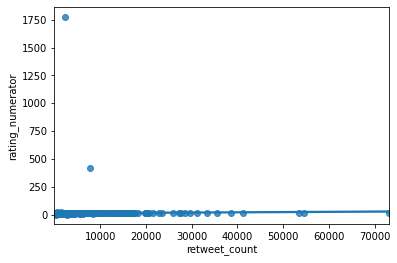

In [119]:
sns.regplot(x = "retweet_count", y = "rating_numerator", data=result)
plt.show()

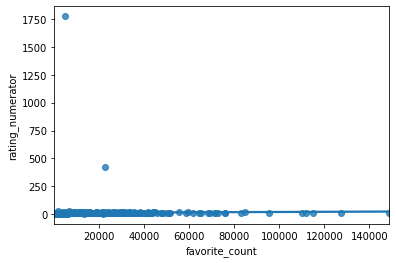

In [120]:
sns.regplot(x = "favorite_count", y = "rating_numerator", data=result)
plt.show()

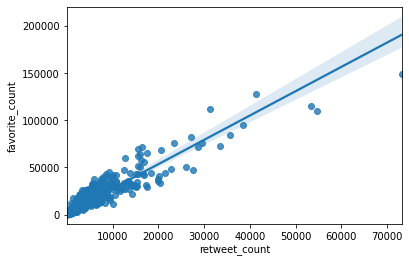

In [121]:
sns.regplot(x = "retweet_count", y = "favorite_count", data=result)
plt.show()

#### Conclusion: Ratings for dogs do not influence retweets or favourites. But there is a direct correlation between retweets and favourites which is a likely outcome as people usually retweet what they like (favourite)

#### 3. Which is the most popular dog_stage (rating_numerator) comparison?

In [122]:
ratings_data = result[['tweet_id', 'rating_numerator', 'rating_denominator', 'dog_stage']].copy()
ratings_data = ratings_data[ratings_data['dog_stage'] != '']
ratings_data.head()

,tweet_id,rating_numerator,rating_denominator,dog_stage
9,890240255349198849,14,10,doggo
12,889665388333682689,13,10,puppo
14,889531135344209921,13,10,puppo
28,886366144734445568,12,10,pupper
39,884162670584377345,12,10,doggo


In [123]:
avg_rating = ratings_data.groupby('dog_stage').rating_numerator.mean()
avg_rating

dog_stage
doggo            11.847222
doggo,floofer    11.000000
doggo,pupper     11.100000
doggo,puppo      13.000000
floofer          11.888889
pupper           10.806306
puppo            12.000000
Name: rating_numerator, dtype: float64

In [124]:
dog_count = ratings_data.groupby('dog_stage').dog_stage.count()
dog_count

dog_stage
doggo             72
doggo,floofer      1
doggo,pupper      10
doggo,puppo        1
floofer            9
pupper           222
puppo             23
Name: dog_stage, dtype: int64

In [125]:
def func(pct, dog_count):
    absolute = int(pct/100.*np.sum(dog_count))
    return "{:.2f}%".format(pct)

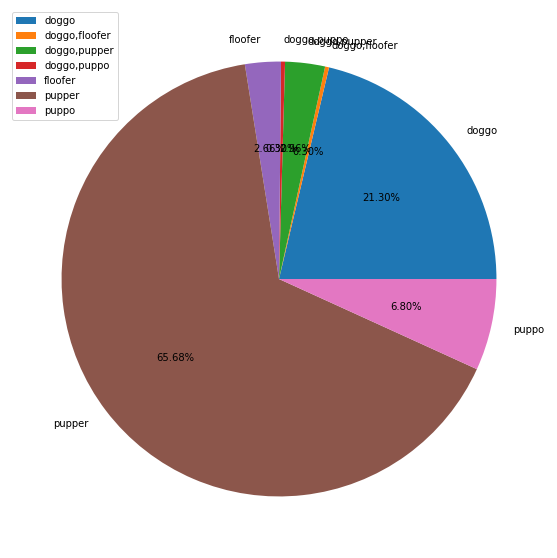

In [126]:
# Plot a pie chart with legend for showing percentage of dogs belonging to different dog stages
plt.figure(figsize = (10, 10))
plt.pie(dog_count, labels = avg_rating.index.values, autopct = lambda pct: func(pct, dog_count))
plt.legend()

#### Conclusion: Puppers FTW!!

#### P.S. This is an interesting assignment. Please provide feedback and interesting perspectives to explore if any. Due to time constraint, I haven't been able to include everything. But will continue working on the same. Thanks!